In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
combined = pd.read_csv('Data/combined.csv')

In [43]:
# bin all the data by delays 
delay_30 = combined.loc[combined['DepDelay'] <= 30]
delay_60 = combined.loc[(combined['DepDelay'] > 30) & (combined['DepDelay'] <= 60)]
delay_90 = combined.loc[(combined['DepDelay'] > 60) & (combined['DepDelay'] <= 90)]
delay_120 = combined.loc[(combined['DepDelay'] > 90) & (combined['DepDelay'] <= 120)]
delay_150 = combined.loc[(combined['DepDelay'] > 120) & (combined['DepDelay'] <= 150)]
delay_180 = combined.loc[(combined['DepDelay'] > 150) & (combined['DepDelay'] <= 180)]
delay_181 = combined.loc[combined['DepDelay'] > 180]

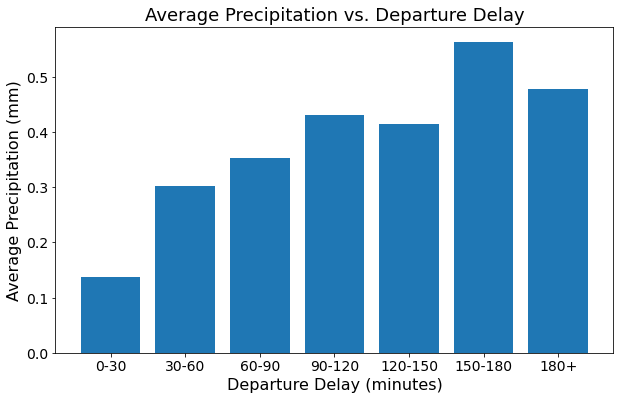

In [37]:
# delay vs precip
x = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180+']
bars = [np.nanmean(delay_30['Precip']), np.nanmean(delay_60['Precip']), np.nanmean(delay_90['Precip']), 
        np.nanmean(delay_120['Precip']), np.nanmean(delay_150['Precip']), np.nanmean(delay_180['Precip']),
       np.nanmean(delay_181['Precip'])]
ax = plt.figure(figsize=(10,6))
plt.bar(x, bars)
plt.xlabel('Departure Delay (minutes)', fontsize=16)
plt.ylabel('Average Precipitation (mm)', fontsize=16)
plt.title('Average Precipitation vs. Departure Delay', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('delay_bin_vs_precip.png')

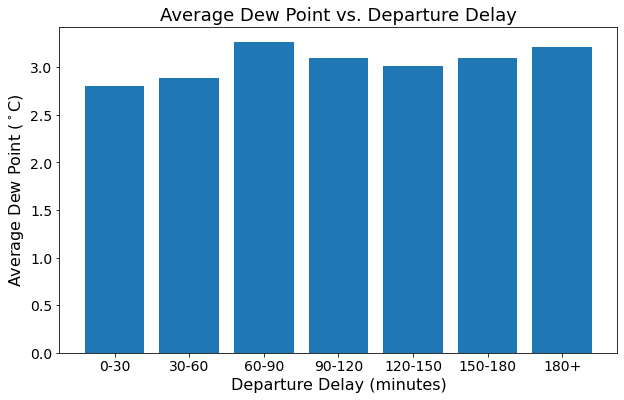

In [41]:
# delay vs dew point
x = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180+']
bars = [np.nanmean(delay_30['DewPoint']), np.nanmean(delay_60['DewPoint']), np.nanmean(delay_90['DewPoint']), 
        np.nanmean(delay_120['DewPoint']), np.nanmean(delay_150['DewPoint']), np.nanmean(delay_180['DewPoint']),
       np.nanmean(delay_181['DewPoint'])]
ax = plt.figure(figsize=(10,6))
plt.bar(x, bars)
plt.xlabel('Departure Delay (minutes)', fontsize=16)
plt.ylabel('Average Dew Point ($^\circ$C)', fontsize=16)
plt.title('Average Dew Point vs. Departure Delay', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('delay_bin_vs_dew.png')

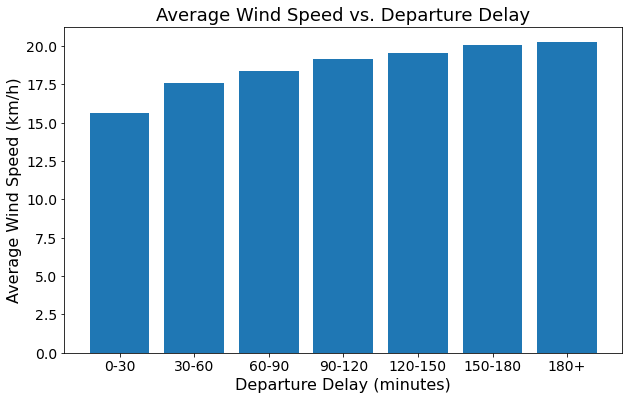

In [40]:
# delay vs wind speed
x = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180+']
bars = [np.nanmean(delay_30['WindSpeed']), np.nanmean(delay_60['WindSpeed']), np.nanmean(delay_90['WindSpeed']), 
        np.nanmean(delay_120['WindSpeed']), np.nanmean(delay_150['WindSpeed']), np.nanmean(delay_180['WindSpeed']),
       np.nanmean(delay_181['WindSpeed'])]
ax = plt.figure(figsize=(10,6))
plt.bar(x, bars)
plt.xlabel('Departure Delay (minutes)', fontsize=16)
plt.ylabel('Average Wind Speed (km/h)', fontsize=16)
plt.title('Average Wind Speed vs. Departure Delay', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('delay_bin_vs_wind.png')

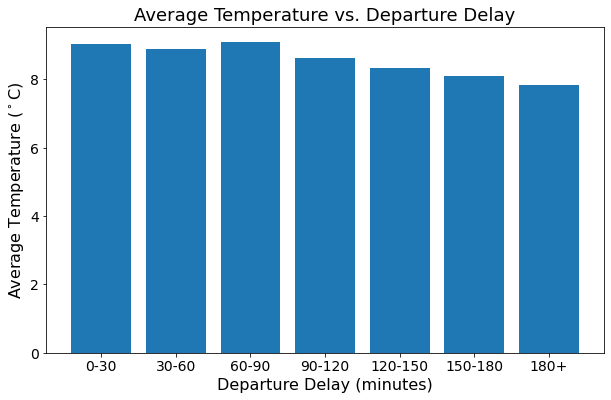

In [42]:
# delay vs temp
x = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-180', '180+']
bars = [np.nanmean(delay_30['Temp']), np.nanmean(delay_60['Temp']), np.nanmean(delay_90['Temp']), 
        np.nanmean(delay_120['Temp']), np.nanmean(delay_150['Temp']), np.nanmean(delay_180['Temp']),
       np.nanmean(delay_181['Temp'])]
ax = plt.figure(figsize=(10,6))
plt.bar(x, bars)
plt.xlabel('Departure Delay (minutes)', fontsize=16)
plt.ylabel('Average Temperature ($^\circ$C)', fontsize=16)
plt.title('Average Temperature vs. Departure Delay', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('delay_bin_vs_temp.png')